In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import imread, gaussian_filter
import csv
import os

def lineout(data, start, stop):
    length=np.sqrt((stop[0]-start[0])**2+(stop[1]-start[1])**2)
    xs, ys=np.linspace(start[0], stop[0], length), np.linspace(start[1], stop[1], length)
    lineout = data[xs.astype(np.int), ys.astype(np.int)]
    return lineout

def band_pass(data, low_sigma, hi_sigma):
    data=np.sum(data,2)
    low_pass=gaussian_filter(data, low_sigma)
    norm=data/low_pass.astype(float)
    hi_pass=gaussian_filter(norm, hi_sigma)
    return hi_pass

In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0822_16 Reconnection C - TS w kz

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0822_16 Reconnection C - TS w kz


In [3]:
plas = imread('s0822_16 532nm end on itnerferometry (1).JPG')
plas_rough=np.sum(plas,2)
plas = band_pass(plas, low_sigma=50,hi_sigma=5)
vac = imread('s0822_16 532nm end on itnerferometry (3).JPG')
vac_rough=np.sum(vac,2)
vac = band_pass(vac, low_sigma=50,hi_sigma=5)

In [4]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
filename=shot+ ' pin positions'
f=[]
xx=[]
yy=[]
with open(filename+'.txt', 'r') as fn:
    reader = csv.reader(fn, delimiter=',')
    next(reader)
    for row in reader:
        f.append(float(row[0]))
        xx.append(float(row[1]))
        yy.append(float(row[2]))
        
xm, xc=np.polyfit(f,xx, 1)
ym, yc=np.polyfit(f, yy, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)
circles=[]
for i in range(1,15):
    color='green'
    if i is 7:
        color='blue'
    circles.append(plt.Circle((x(i),y(i)),20,color=color,fill=False))

<IPython.core.display.Javascript object>


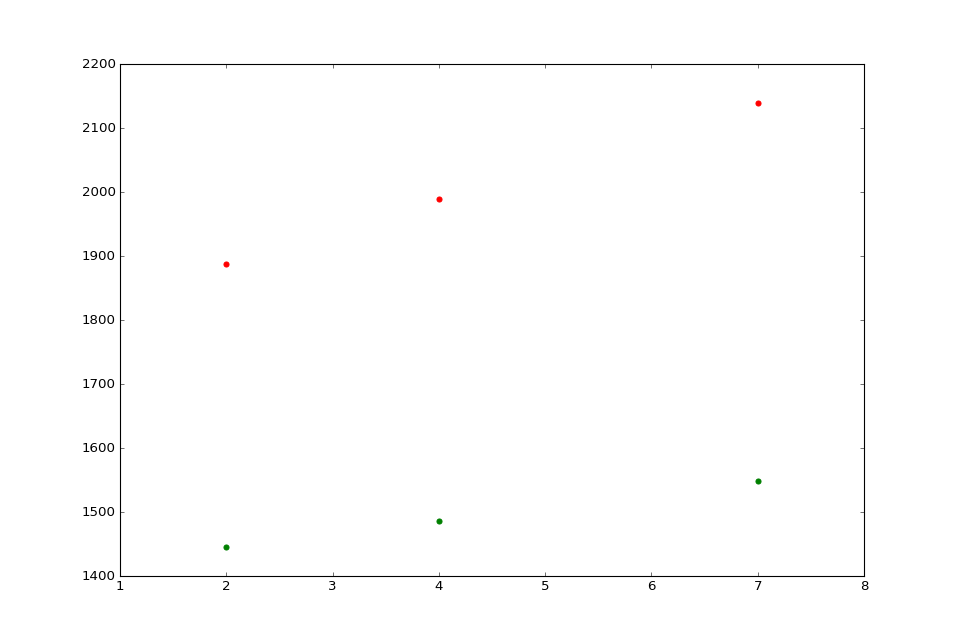

In [5]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(f,np.array([x(ff) for ff in f]), color='red')
ax.scatter(f,np.array([y(ff) for ff in f]), color='green')

<IPython.core.display.Javascript object>


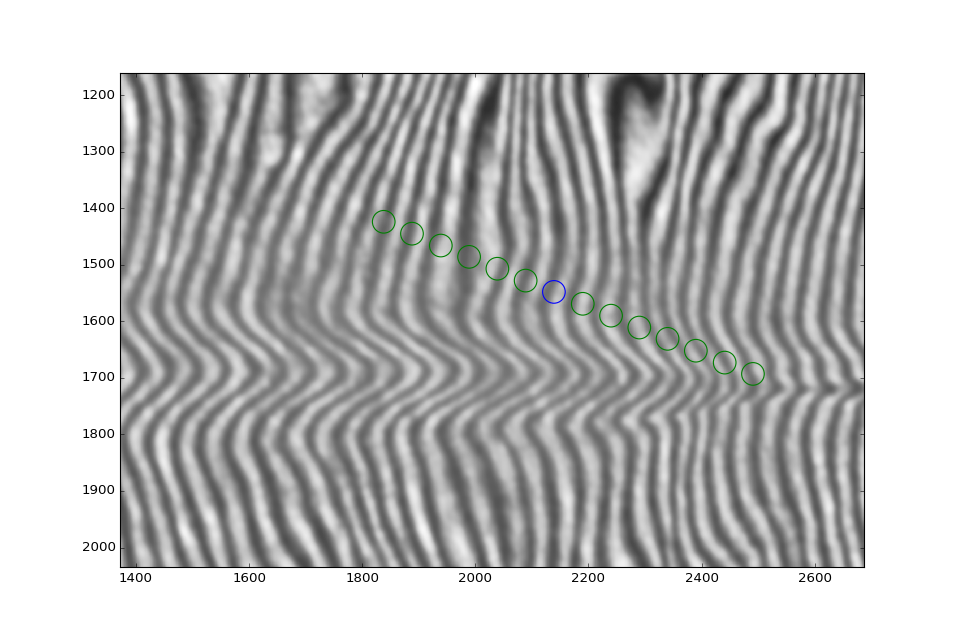

In [6]:
fig, ax=plt.subplots(figsize=(12,8))
for c in circles:
    ax.add_artist(c)
im=ax.imshow(plas, cmap='Greys_r', interpolation='none', clim=[0,2])

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


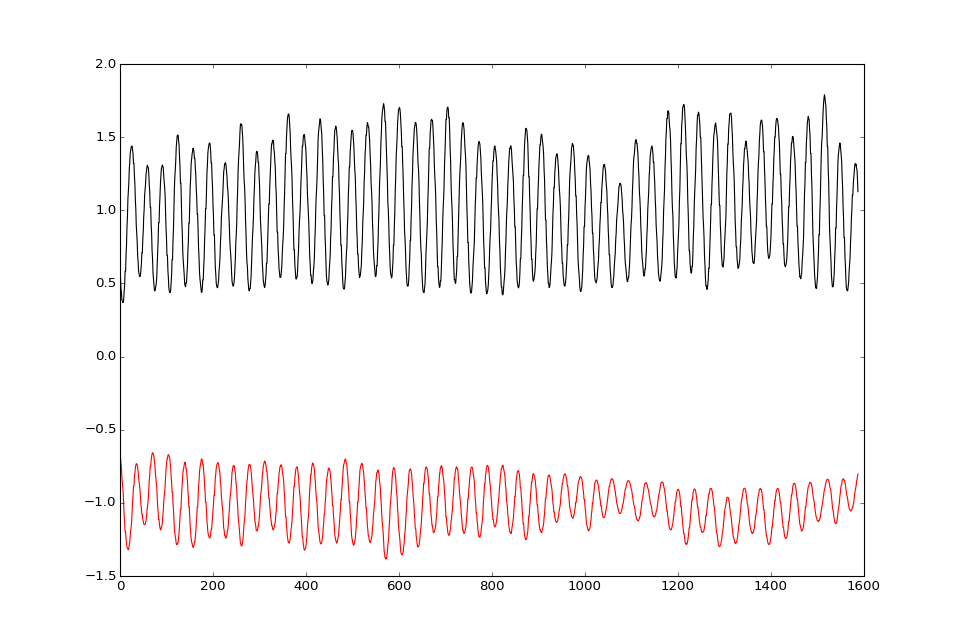

In [37]:
f=1
start_h=(715,1224)
stop=(1598,2544)
#stop=(y(f),x(f))

lov=lineout(vac, start_h, stop)
lop=lineout(plas, start_h, stop)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(lov, color='black')
ax.plot(-lop, color='red')

In [53]:
One_Fringe=4.2e17*1.5
Fringe_vac=24
Fringe_plas=23.25
(Fringe_plas-Fringe_vac)*One_Fringe

-4.725e+17

## Load an actual ne map

In [45]:
d=np.loadtxt(open("s1026_15 532nm neL.txt","r"),delimiter=",")
d=d-np.nan_to_num(d).min()
d=np.nan_to_num(d)
d=d/1.6

<IPython.core.display.Javascript object>


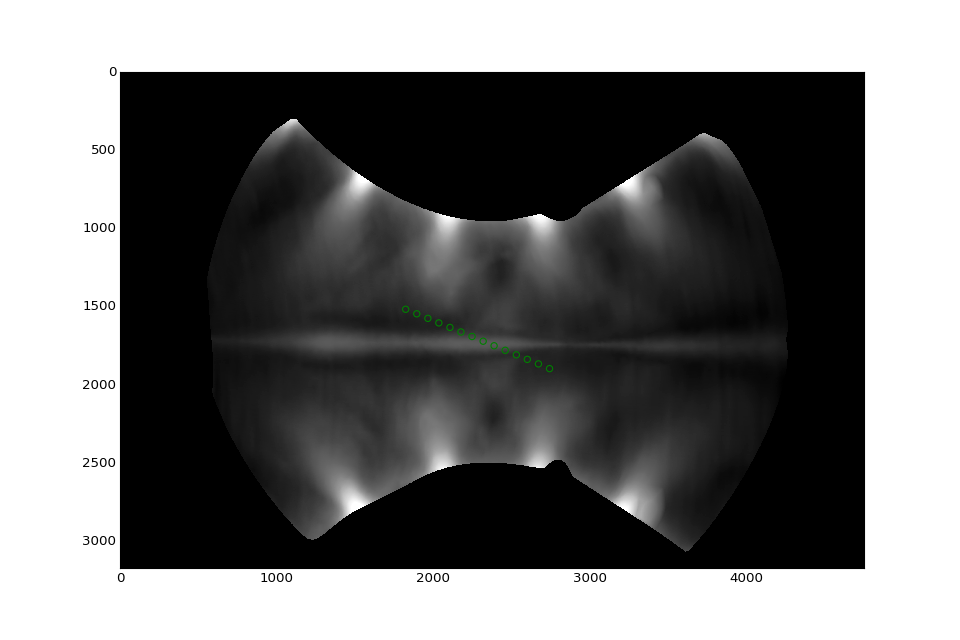

In [52]:
fig, ax=plt.subplots(figsize=(12,8))
for c in circles:
    ax.add_artist(c)
im=ax.imshow(d/1.6e18, cmap='Greys_r', interpolation='none', clim=[0,2])

In [55]:
ne=[]
for f in range(1,15):
    ne.append(d[y(f), x(f)])
filename=shot+" ne at fibres"
data=zip(range(1,15), ne)
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['fibre','ne'])
    for f in data:
        cwriter.writerow(f)

In [56]:
for f in ne:
    print(f)

4.127625e+17
4.142625e+17
4.154625e+17
3.8705e+17
3.962e+17
5.23225e+17
6.914375e+17
8.5730625e+17
8.7186875e+17
6.3076875e+17
4.20225e+17
4.1874375e+17
3.8535625e+17
3.8444375e+17


# Old Code

In [5]:
#s1006_15 TS C upstream
scale=int(4752/2352.0) #in this shot the pin positions were taken low res....
f2=(1035,1002)
f4=(1062,1065)
f7=(1107,1182)
f10=(1155,1284)
f12=(1182,1359)

dy=f12[0]-f2[0]
dx=f12[1]-f2[1]
y0=f2[0]-2*dy/10.0
x0=f2[1]-2*dx/10.0
y=lambda f: scale*int(f*dy/10.0+y0)
x=lambda f: scale*int(f*dx/10.0+x0)

In [66]:
#s1008_15 TS Al outflow
f2=(1612,1716)
f4=(1656,1840)
f7=(1756,2068)
f10=(1852,2304)
f12=(1904,2428)
dy=f12[0]-f2[0]
dx=f12[1]-f2[1]
y0=f2[0]-2*dy/10.0
x0=f2[1]-2*dx/10.0
y=lambda f: int(f*dy/10.0+y0)
x=lambda f: int(f*dx/10.0+x0)

(1427, 2011)


NameError: name 'peak_count' is not defined

1.05e+18

In [161]:
#Probab;y the best so far.
def peak_count(data):
    m=data.mean()
    upper=m*1.1
    lower=m*0.9
    low_peak=0
    hi_peak=0
    in_peak=False
    locs=[]
    for din, d in enumerate(data):
        if d>upper and in_peak is False:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d<upper and d>lower and in_peak is True:
            in_peak=False
        if d<lower and in_peak is False:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

In [134]:
start_h=(2095,638)#(y(1),x(1))
One_Fringe=4.2e17
neLs=[]

for f in range(14):
    f=f+1
    stop=(y(f),x(f))
    lov=lineout(vac, start_h, stop)
    lop=lineout(plas, start_h, stop)
    peaks_v, locs_v=peak_count(lov)
    peaks_p, locs_p=peak_count(lop)
    FS=(peaks_p-peaks_v)
    neL=FS*One_Fringe
    neLs.append(neL/1e17)
    print(FS, neL)

2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
1.0 4.2e+17
1.0 4.2e+17
1.5 6.3e+17
2.0 8.4e+17
3.5 1.47e+18
3.0 1.26e+18
2.5 1.05e+18
2.0 8.4e+17
1.0 4.2e+17


In [159]:
def moving_std(data, window=20):
    std=[]
    for din, d in enumerate(data):
        lower=din-window
        upper=din+window
        if lower<0:
            lower=0
        if upper>data.size:
            upper=-1
        std.append(np.std(data[lower:upper]))
    return std

def peak_count(data, window=50):
    m=data.mean()
    std=moving_std(data, window)
    low_peak=0
    hi_peak=0
    in_peak=False
    locs=[]
    for din, d in enumerate(data):
        upper=m+0.1*std[din]
        lower=m-0.1*std[din]
        if d>upper and in_peak is False:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d<upper and d>lower and in_peak is True:
            in_peak=False
        if d<lower and in_peak is False:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


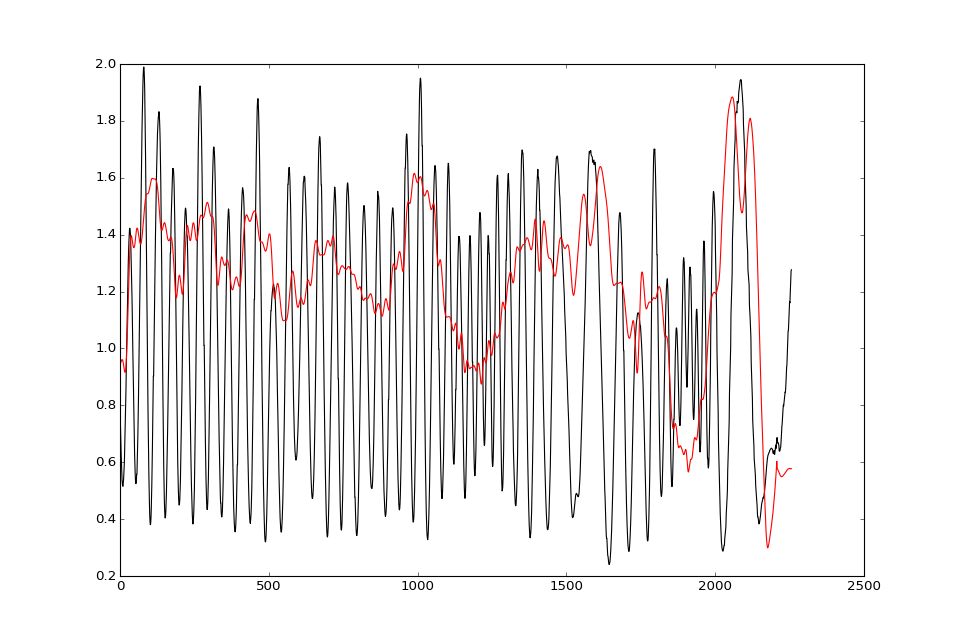

In [149]:
mst=moving_std(lop, window=50)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(lop, color='black')
ax.plot(np.array(mst)*3, color='red')


In [177]:
def local_max(data, window=50):
    lmax=[]
    std=[]
    for din, d in enumerate(data):
        lower=din-window
        upper=din+window
        if lower<0:
            lower=0
        if upper>data.size:
            upper=-1
        std.append(data[lower:upper].max())
    return std

def local_min(data, window=50):
    lmax=[]
    std=[]
    for din, d in enumerate(data):
        lower=din-window
        upper=din+window
        if lower<0:
            lower=0
        if upper>data.size:
            upper=-1
        std.append(data[lower:upper].min())
    return std

def peak_count(data, window=50):
    lmin=local_min(data,window)
    lmax=local_max(data,window)
    low_peak=0
    hi_peak=0
    locs=[]
    for din, d in enumerate(data):
        if d==lmax[din]:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d==lmin[din]:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

In [178]:
peak_count(lop, 50)

(10.0,
 [10,
  81,
  198,
  273,
  438,
  463,
  565,
  635,
  659,
  754,
  866,
  891,
  917,
  1011,
  1076,
  1139,
  1208,
  1229,
  1328])